## K mediod clustering when K = 5

In [1]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from math import*

from scipy.spatial.distance import pdist,squareform



In [2]:
def manhattan_distance(person1, person2):
    distance = 0
    distance += abs(person1 - person2)
    return distance

In [3]:

Assigned_cluster = pd.DataFrame(np.zeros((195, 1), dtype=int))


In [4]:
def silhoutte(a,b):
    average_a = sum(a)/len(a)
    
    

In [5]:
dataset = pd.read_csv('Mall_Customers.csv')
customer = dataset.to_numpy()

## Calcluating dissimlarity matrix

In [6]:
squareform(pdist(customer[:,2:], metric='euclidean'))#---------calculating dissimilarity matrix

array([[  0.        ,  42.04759208,  33.03028913, ..., 117.1110584 ,
        124.47489707, 130.15759678],
       [ 42.04759208,   0.        ,  75.01333215, ..., 111.7631424 ,
        137.74614332, 122.34786471],
       [ 33.03028913,  75.01333215,   0.        , ..., 129.87686476,
        122.18428704, 143.77065069],
       ...,
       [117.1110584 , 111.7631424 , 129.87686476, ...,   0.        ,
         57.07013229,  14.35270009],
       [124.47489707, 137.74614332, 122.18428704, ...,  57.07013229,
          0.        ,  65.03076195],
       [130.15759678, 122.34786471, 143.77065069, ...,  14.35270009,
         65.03076195,   0.        ]])

In [7]:
print(customer[1][:]) 
k = 5 #----------------NUMBER OF CLUSTERS
print(dataset[1:10])

[2 'Male' 21 15 81]
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


## Plotting graph before clustering


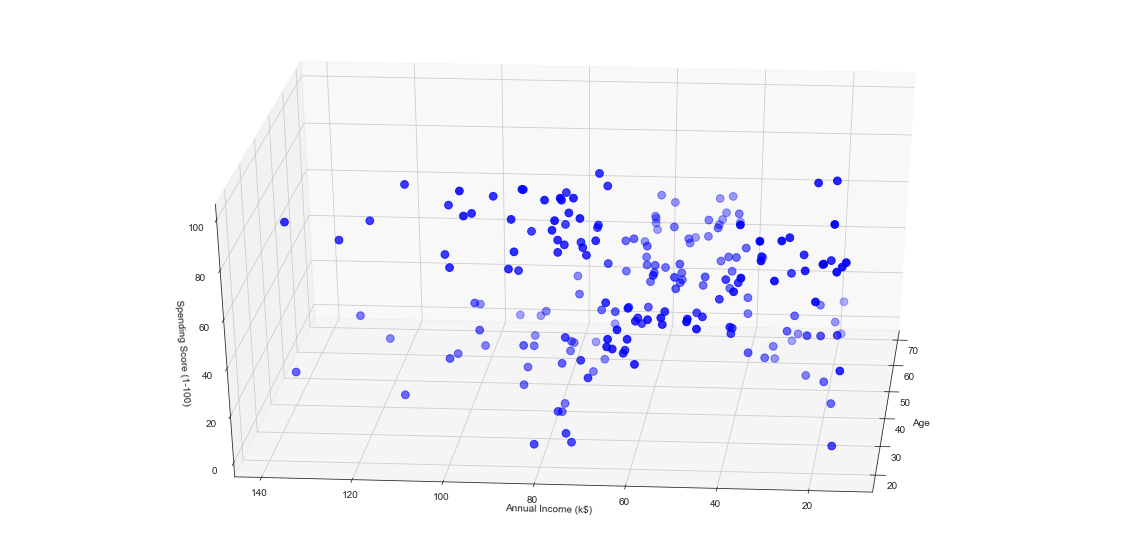

In [8]:
#-----------------before clustering
sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.Age, dataset["Annual Income (k$)"], dataset["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [9]:
mediod = customer[np.random.choice(customer.shape[0], k, replace=False), :]#---------randomly choosing mediods


In [10]:
print(mediod[:])
#print(customer[128])

#print(dataset)
print(dataset.iloc[49][2])

[[108 'Male' 54 63 46]
 [56 'Male' 47 43 41]
 [78 'Male' 40 54 48]
 [166 'Female' 36 85 75]
 [104 'Male' 26 62 55]]
31


In [11]:
mediod[0,0] - 1

107

In [12]:
###*********************                           #----------delete the mediods value from dataset
customer_new = np.delete(customer, (mediod[0,0] - 1, mediod[1,0] - 1, mediod[2,0] - 1, mediod[3,0] - 1,mediod[4,0] - 1), axis=0)#-------need to be changed as the value of k changes
#dataset1 = np.delete(dataset, (mediod[0,0] - 1, mediod[1,0] - 1, mediod[2,0] - 1, mediod[3,0] - 1), axis=0)#-------need to be changed as the value of k changes
dataset_1=dataset.drop(dataset.index[[mediod[0,0] - 1, mediod[1,0] - 1, mediod[2,0] - 1, mediod[3,0] - 1,mediod[4,0] - 1]])


In [13]:
print(mediod[2, 2])
print(customer.shape)
print(customer_new.shape)
distance_age = 0
distance_income = 0
distance_score = 0
total_distance_cost = np.zeros((len(customer_new),k))
print(total_distance_cost.shape)
print(customer_new.shape)
print(dataset_1.shape)
non_mediod = 0


40
(200, 5)
(195, 5)
(195, 5)
(195, 5)
(195, 5)


## Calculating distance between mediod and points and assigning clusters to it

In [14]:
###************************----------------needs to be modified as the value of k changes
#---------------------------comparing when value of k=1
old_cost = 0
total_cost_cluster = 0
difference_cost=0
for l in range(100):
    
    distance_age_k1 = []
    distance_income_k1 = []
    distance_score_k1 = []
    total_distance_k1 = []
    q=0
    w=0
    e=0
    total=0
    i=0

    for j in range(len(customer_new)):#------------------------------calculating distance
        q = manhattan_distance(mediod[i,2],customer_new[j,2])
        distance_age_k1.append(q)
        w = manhattan_distance(mediod[i,3],customer_new[j,3])
        distance_income_k1.append(w)
        e = manhattan_distance(mediod[i,4],customer_new[j,4])
        distance_score_k1.append(e)
        total = q+w+e
        total_distance_k1.append(total)

    #---------------------------comparing when value of k=2        

    distance_age_k2 = []
    distance_income_k2 = []
    distance_score_k2 = []
    total_distance_k2 = []
    q=0
    w=0
    e=0
    total=0
    i=1
    for j in range(len(customer_new)):#------------calcualting distance
        q = manhattan_distance(mediod[i,2],customer_new[j,2])
        distance_age_k2.append(q)
        w = manhattan_distance(mediod[i,3],customer_new[j,3])
        distance_income_k2.append(w)
        e = manhattan_distance(mediod[i,4],customer_new[j,4])
        distance_score_k2.append(e)
        total = q+w+e
        total_distance_k2.append(total)

    #---------------------------comparing when value of k=3       
    distance_age_k3 = []
    distance_income_k3 = []
    distance_score_k3 = []
    total_distance_k3 = []
    q=0
    w=0
    e=0
    total=0
    i=2


    for j in range(len(customer_new)):#-----------------------------------calculating distance
        q = manhattan_distance(mediod[i,2],customer_new[j,2])
        distance_age_k3.append(q)
        w = manhattan_distance(mediod[i,3],customer_new[j,3])
        distance_income_k3.append(w)
        e = manhattan_distance(mediod[i,4],customer_new[j,4])
        distance_score_k3.append(e)
        total = q+w+e
        total_distance_k3.append(total)


    #---------------------------comparing when value of k=4        
    distance_age_k4 = []
    distance_income_k4 = []
    distance_score_k4 = []
    total_distance_k4 = []
    q=0
    w=0
    e=0
    total=0
    i=3
    for j in range(len(customer_new)):
        q = manhattan_distance(mediod[i,2],customer_new[j,2])
        distance_age_k4.append(q)
        w = manhattan_distance(mediod[i,3],customer_new[j,3])
        distance_income_k4.append(w)
        e = manhattan_distance(mediod[i,4],customer_new[j,4])
        distance_score_k4.append(e)
        total = q+w+e
        total_distance_k4.append(total)        
        
    
    
    
    
    #---------------------------comparing when value of k=5        
    distance_age_k5 = []
    distance_income_k5 = []
    distance_score_k5 = []
    total_distance_k5 = []
    q=0
    w=0
    e=0
    total=0
    i=4
    for j in range(len(customer_new)):
        q = manhattan_distance(mediod[i,2],customer_new[j,2])
        distance_age_k5.append(q)
        w = manhattan_distance(mediod[i,3],customer_new[j,3])
        distance_income_k5.append(w)
        e = manhattan_distance(mediod[i,4],customer_new[j,4])
        distance_score_k5.append(e)
        total = q+w+e
        total_distance_k5.append(total)        



    #print(len(total_distance_k1))
    #print(len(total_distance_k2))

    #print(len(total_distance_k3))

    #print(len(total_distance_k4))

    cost_1 = pd.DataFrame({'Cost_1':total_distance_k1})
    cost_2 = pd.DataFrame({'Cost_2':total_distance_k2})
    cost_3 = pd.DataFrame({'Cost_3':total_distance_k3})
    cost_4 = pd.DataFrame({'Cost_4':total_distance_k4})
    cost_5 = pd.DataFrame({'Cost_5':total_distance_k5})

    #dfn = pd.concat([dataset_1,cost_1,cost_2,cost_3,cost_4], axis=1)
    #dfn= pd.merge(dataset_1, cost_1,cost_2,cost_3,cost_4,)
    dataset_1 = dataset_1.assign(cost_1=cost_1.values,cost_2=cost_2.values,cost_3=cost_3.values,cost_4=cost_4.values,cost_5=cost_5.values,Assigned_cluster=Assigned_cluster.values)
    #print(df_col)

    customer_new = dataset_1.to_numpy()
    #print(customer_new[0:10, :])#---------------combined dataset which displays cost of all k, the last four coloumns are the cost

    #print(dataset_1.shape)
    #print("hello")
    #print(cost_1.shape)
    #print(cost_2.shape)
    #print(cost_3.shape)
    #print(cost_4.shape)
    #print(customer_new.shape)
    #print(dataset_1.shape)



    #*************************************
    #----now we will create 4 clusters as the value of k =4 on the basis of total distance or cost

    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    cluster_4 = []
    cluster_5 = []
    
    q=0
    w=0
    e=0
    r=0
    t=0
    i=0

    for i in range(len(customer_new)):#-------------select the points with minimum distance

        if(customer_new[i][5] <= customer_new[i][6] and customer_new[i][5] <= customer_new[i][7] and customer_new[i][5]<= customer_new[i][8] and customer_new[i][5]<= customer_new[i][9]):
            #print("five")
            q = customer_new[i]
            cluster_1.append(q)
            dataset_1.iloc[i, dataset_1.columns.get_loc('Assigned_cluster')] = "Cluster_1"
            


        if(customer_new[i][6] <= customer_new[i][5] and customer_new[i][6] <= customer_new[i][7] and customer_new[i][6]<= customer_new[i][8] and customer_new[i][6]<= customer_new[i][9]):
            #print("six")
            w = customer_new[i]
            cluster_2.append(w)
            dataset_1.iloc[i, dataset_1.columns.get_loc('Assigned_cluster')] = "Cluster_2"

        if(customer_new[i][7] <= customer_new[i][6] and customer_new[i][7] <= customer_new[i][5] and customer_new[i][7]<= customer_new[i][8] and customer_new[i][7]<= customer_new[i][9]):
           # print("seven")
            e = customer_new[i]
            cluster_3.append(e)
            dataset_1.iloc[i, dataset_1.columns.get_loc('Assigned_cluster')] = "Cluster_3"

        if(customer_new[i][8] <= customer_new[i][6] and customer_new[i][8] <= customer_new[i][7] and customer_new[i][8]<= customer_new[i][5] and customer_new[i][8]<= customer_new[i][9]):
           # print("eight")
            r = customer_new[i]
            cluster_4.append(r)
            dataset_1.iloc[i, dataset_1.columns.get_loc('Assigned_cluster')] = "Cluster_4"
            
        if(customer_new[i][9] <= customer_new[i][6] and customer_new[i][9] <= customer_new[i][7] and customer_new[i][9]<= customer_new[i][8] and customer_new[i][9]<= customer_new[i][5]):
           # print("eight")
            t = customer_new[i]
            cluster_5.append(t)
            dataset_1.iloc[i, dataset_1.columns.get_loc('Assigned_cluster')] = "Cluster_5"
            
    print("lenth is", + len(cluster_5))
    if(len(cluster_5) == 0):
        cluster_5 = cluster_5_old
    if(len(cluster_4) == 0):
        cluster_4 = cluster_4_old
    if(len(cluster_3) == 0):
        cluster_3 = cluster_3_old
    if(len(cluster_2) == 0):
        cluster_2 = cluster_2_old
    if(len(cluster_1) == 0):
        cluster_1 = cluster_2_old
    total_cost_cluster = 0
    difference_cost=0
    cluster_1 = np.asarray(cluster_1)
    cluster_2 = np.asarray(cluster_2)
    cluster_3 = np.asarray(cluster_3)
    cluster_4 = np.asarray(cluster_4)
    cluster_5 = np.asarray(cluster_5)
    sum_cluster_1 = cluster_1[:,5].sum(axis=0)#----------adding all the particalura coloumn which is cost of particular cluster
    sum_cluster_2 = cluster_2[:,6].sum(axis=0)
    sum_cluster_3 = cluster_3[:,7].sum(axis=0)#-------adding all the minimum cost of particualr clusters
    sum_cluster_4 = cluster_4[:,8].sum(axis=0)
    sum_cluster_5 = cluster_5[:,9].sum(axis=0)
    total_cost_cluster = sum_cluster_1 + sum_cluster_2 + sum_cluster_3 +sum_cluster_4+sum_cluster_5
    print(total_cost_cluster, l+1)  
    #print(mediod)
    
    difference_cost = total_cost_cluster - old_cost
    if (difference_cost<=0):#------------bad cost
        non_mediod = customer_new[np.random.choice(customer_new.shape[0], 1, replace=False), :]#---------for cluster1
        non_mediod = np.delete(non_mediod, np.s_[4:10], axis=1) 
        mediod[4]= non_mediod
        old_cost = total_cost_cluster
        print("difference is", + difference_cost)
    cluster_5_old = cluster_5
    old_cost = total_cost_cluster
    
    difference_cost= total_cost_cluster - old_cost
    if (difference_cost<=0):#------------bad cost
        non_mediod = customer_new[np.random.choice(customer_new.shape[0], 1, replace=False), :]#---------for cluster2
        non_mediod = np.delete(non_mediod, np.s_[4:10], axis=1) 
        mediod[3]= non_mediod
        old_cost = total_cost_cluster
        #print("difference is", + difference_cost)
    cluster_4_old = cluster_4
    old_cost = total_cost_cluster
    
    difference_cost= total_cost_cluster - old_cost
    if (difference_cost<=0):#------------bad cost
        non_mediod = customer_new[np.random.choice(customer_new.shape[0], 1, replace=False), :]#---------for cluster3
        non_mediod = np.delete(non_mediod, np.s_[4:10], axis=1) 
        mediod[2]= non_mediod
        old_cost = total_cost_cluster
        #print("difference is", + difference_cost)
    cluster_3_old = cluster_3
    old_cost = total_cost_cluster
    
    
    if (difference_cost<=0):#------------bad cost
        non_mediod = customer_new[np.random.choice(customer_new.shape[0], 1, replace=False), :]#---------for cluster4
        non_mediod = np.delete(non_mediod, np.s_[4:10], axis=1) 
        mediod[1]= non_mediod
        old_cost = total_cost_cluster
        #print("difference is", + difference_cost)
    cluster_2_old = cluster_2
    old_cost = total_cost_cluster
    
    if (difference_cost<=0):#------------bad cost
        non_mediod = customer_new[np.random.choice(customer_new.shape[0], 1, replace=False), :]#---------for cluster 5
        non_mediod = np.delete(non_mediod, np.s_[4:10], axis=1) 
        mediod[0]= non_mediod
        old_cost = total_cost_cluster
        print("difference is", + difference_cost)
    cluster_1_old = cluster_1
    old_cost = total_cost_cluster

lenth is 49
7642 1
difference is 0
lenth is 138
9070 2
difference is 0
lenth is 136
8824 3
difference is -246
difference is 0
lenth is 37
14423 4
difference is 0
lenth is 38
14643 5
difference is 0
lenth is 42
14142 6
difference is -501
difference is 0
lenth is 26
14109 7
difference is -33
difference is 0
lenth is 36
13798 8
difference is -311
difference is 0
lenth is 43
15310 9
difference is 0
lenth is 23
15993 10
difference is 0
lenth is 28
13361 11
difference is -2632
difference is 0
lenth is 44
17742 12
difference is 0
lenth is 48
13332 13
difference is -4410
difference is 0
lenth is 38
14580 14
difference is 0
lenth is 57
14377 15
difference is -203
difference is 0
lenth is 34
14146 16
difference is -231
difference is 0
lenth is 40
16494 17
difference is 0
lenth is 60
13506 18
difference is -2988
difference is 0
lenth is 59
14266 19
difference is 0
lenth is 36
13781 20
difference is -485
difference is 0
lenth is 28
16198 21
difference is 0
lenth is 46
14298 22
difference is -1900


## New coloumn added below for assigned cluster

In [15]:
dataset_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cost_1,cost_2,cost_3,cost_4,cost_5,Assigned_cluster
0,1,Male,19,15,39,151,105,98,93,102,Cluster_4
1,2,Male,21,15,81,191,149,138,133,142,Cluster_4
2,3,Female,20,16,6,116,72,63,58,67,Cluster_4
3,4,Female,23,16,77,184,146,131,126,135,Cluster_4
4,5,Female,31,17,40,138,116,85,80,101,Cluster_4
...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,88,134,171,174,137,Cluster_1
196,197,Female,45,126,28,53,99,116,119,102,Cluster_1
197,198,Male,32,126,74,88,132,175,178,135,Cluster_1
198,199,Male,32,137,18,43,87,130,133,90,Cluster_1


## Calculating silhoutte width of each cluster

In [16]:
distance_age_k2 = []
distance_income_k2 = []
distance_score_k2 = []
total_distance_k2 = []
distance_sil = []
average_sill = []
total=0
q=0
w=0
e=0
a=0

total=0

for i in range(len(cluster_1)):
    for j in range(len(cluster_1)):#------------calcualting distance
        q = manhattan_distance(cluster_1[i,2],cluster_1[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(cluster_1[i,3],cluster_1[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(cluster_1[i,4],cluster_1[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_sil.append(total/3)
    a_sil = sum(distance_sil)/len(cluster_1)
    #print(a_sil)
    distance_sil.clear()
    

    cluster_min=0
    
    distance_age_k2 = []
    distance_income_k2 = []
    distance_score_k2 = []
    total_distance_k2 = []
    distance_sil = []
    q=0
    w=0
    e=0
    a=0

    total=0
    n=0#--------------for cluster 1
    for j in range(len(mediod)):#------------calcualting nearest cluster
        q = manhattan_distance(mediod[n,2],mediod[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(mediod[n,3],mediod[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(mediod[n,4],mediod[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_sil.append(total)
    #print(distance_sil)
    index = [i for i in range(0,5)]
    #print(index)
    index=np.asarray(index)
    distance_sil= np.asarray(distance_sil)
    distance_sil.transpose
    #print(distance_sil)
    distance_sil = np.column_stack((index,distance_sil))
    #print(distance_sil[:,1])
    minval = np.min(distance_sil[:,1][np.nonzero(distance_sil[:,1])])
    #print(minval)
    for b in range(len(distance_sil)):
        if (minval == distance_sil[b,1]):
            cluster_min = b
            #print(cluster_min)




    #---------now find the value of b
    if (cluster_min == 0):
            selected_cluster= cluster_1
    if (cluster_min == 1):
            selected_cluster= cluster_2
    if (cluster_min == 2):
            selected_cluster= cluster_3
    if (cluster_min == 3):
            selected_cluster= cluster_4
    if (cluster_min == 4):
            selected_cluster= cluster_5

    distance_age_k2 = []
    distance_b= []
    distance_income_k2 = []
    distance_score_k2 = []
    total_distance_k2 = []
    distance_sil = []
    q=0
    w=0
    e=0
    a=0
    s=0

    total=0
    
    for j in range(len(selected_cluster)):#------------calcualting distance


        q = manhattan_distance(cluster_1[i,2],selected_cluster[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(cluster_1[i,3],selected_cluster[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(cluster_1[i,4],selected_cluster[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_b.append(total)
   # print(min(distance_b))
    b = min(distance_b)
    maxi = max(b, a_sil)
    #print("a is", + maxi)
    d = b - a_sil
    sill = ((b - a_sil) / maxi)#------------silhoutte widht formulae
    print("Silhoutte width for each point in cluster 1", +  sill)
    
    average_sill.append(sill)
s_c1 = sum(average_sill)/len(average_sill)
print("Average silhoutee width for cluster 4", + s_c1)

Silhoutte width for each point in cluster 1 -0.0024183796856107093
Silhoutte width for each point in cluster 1 -0.19878603945371787
Silhoutte width for each point in cluster 1 0.48390151515151514
Silhoutte width for each point in cluster 1 0.17493112947658415
Silhoutte width for each point in cluster 1 0.09917355371900834
Silhoutte width for each point in cluster 1 0.17127799736495397
Silhoutte width for each point in cluster 1 0.4876893939393939
Silhoutte width for each point in cluster 1 0.11616161616161606
Silhoutte width for each point in cluster 1 0.4251082251082251
Silhoutte width for each point in cluster 1 0.43838383838383843
Silhoutte width for each point in cluster 1 0.33221099887766536
Silhoutte width for each point in cluster 1 0.44477028347996084
Silhoutte width for each point in cluster 1 0.3624708624708624
Silhoutte width for each point in cluster 1 0.4897360703812317
Silhoutte width for each point in cluster 1 0.5109231853417899
Silhoutte width for each point in cluster

In [17]:
distance_age_k2 = []
distance_income_k2 = []
distance_score_k2 = []
total_distance_k2 = []
distance_sil = []
average_sill = []
total=0
q=0
w=0
e=0
a=0

total=0

for i in range(len(cluster_2)):
    for j in range(len(cluster_2)):#------------calcualting distance
        q = manhattan_distance(cluster_2[i,2],cluster_2[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(cluster_2[i,3],cluster_2[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(cluster_2[i,4],cluster_2[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_sil.append(total/3)
    a_sil = sum(distance_sil)/len(cluster_2)
    #print(a_sil)
    distance_sil.clear()
    

    
    cluster_min=0
    
    distance_age_k2 = []
    distance_income_k2 = []
    distance_score_k2 = []
    total_distance_k2 = []
    distance_sil = []
    q=0
    w=0
    e=0
    a=0

    total=0
    n=1#--------------for cluster 2
    for j in range(len(mediod)):#------------calcualting nearest cluster
        q = manhattan_distance(mediod[n,2],mediod[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(mediod[n,3],mediod[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(mediod[n,4],mediod[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_sil.append(total)
    #print(distance_sil)
    index = [i for i in range(0,5)]
    #print(index)
    index=np.asarray(index)
    distance_sil= np.asarray(distance_sil)
    distance_sil.transpose
    #print(distance_sil)
    distance_sil = np.column_stack((index,distance_sil))
    #print(distance_sil[:,1])
    minval = np.min(distance_sil[:,1][np.nonzero(distance_sil[:,1])])
    #print(minval)
    for b in range(len(distance_sil)):
        if (minval == distance_sil[b,1]):
            cluster_min = b
            #print(cluster_min)




    #---------now find the value of b
    if (cluster_min == 0):
            selected_cluster= cluster_1
    if (cluster_min == 1):
            selected_cluster= cluster_2
    if (cluster_min == 2):
            selected_cluster= cluster_3
    if (cluster_min == 3):
            selected_cluster= cluster_4
    if (cluster_min == 4):
            selected_cluster= cluster_5

    distance_age_k2 = []
    distance_b= []
    distance_income_k2 = []
    distance_score_k2 = []
    total_distance_k2 = []
    distance_sil = []
    q=0
    w=0
    e=0
    a=0
    s=0

    total=0
    
    for j in range(len(selected_cluster)):#------------calcualting distance


        q = manhattan_distance(cluster_2[i,2],selected_cluster[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(cluster_2[i,3],selected_cluster[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(cluster_2[i,4],selected_cluster[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_b.append(total)
   # print(min(distance_b))
    b = min(distance_b)
    maxi = max(b, a_sil)
    #print("a is", + maxi)
    d = b - a_sil
    sill = ((b - a_sil) / maxi)#------------silhoutte widht formulae
    print("Silhoutte width for each point in cluster 2", +  sill)
    
    average_sill.append(sill)
s_c2 = sum(average_sill)/len(average_sill)
print("Average silhoutee width for cluster 2", + s_c2)

Silhoutte width for each point in cluster 2 0.6762820512820512
Silhoutte width for each point in cluster 2 0.7343073593073594
Silhoutte width for each point in cluster 2 0.6930147058823529
Silhoutte width for each point in cluster 2 0.5462962962962963
Silhoutte width for each point in cluster 2 0.6927083333333334
Silhoutte width for each point in cluster 2 0.7214611872146118
Silhoutte width for each point in cluster 2 0.6912878787878788
Silhoutte width for each point in cluster 2 0.6482558139534884
Silhoutte width for each point in cluster 2 0.7222222222222222
Silhoutte width for each point in cluster 2 0.713276836158192
Silhoutte width for each point in cluster 2 0.7520491803278688
Silhoutte width for each point in cluster 2 0.7144607843137255
Silhoutte width for each point in cluster 2 0.6602564102564104
Silhoutte width for each point in cluster 2 0.7306763285024155
Silhoutte width for each point in cluster 2 0.6577380952380951
Silhoutte width for each point in cluster 2 0.6992424242

In [18]:
distance_age_k2 = []
distance_income_k2 = []
distance_score_k2 = []
total_distance_k2 = []
distance_sil = []
average_sill = []
total=0
q=0
w=0
e=0
a=0

total=0

for i in range(len(cluster_3)):
    for j in range(len(cluster_3)):#------------calcualting distance
        q = manhattan_distance(cluster_3[i,2],cluster_3[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(cluster_3[i,3],cluster_3[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(cluster_3[i,4],cluster_3[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_sil.append(total/3)
    a_sil = sum(distance_sil)/len(cluster_3)
    #print(a_sil)
    distance_sil.clear()
    

    cluster_min=0
    
    distance_age_k2 = []
    distance_income_k2 = []
    distance_score_k2 = []
    total_distance_k2 = []
    distance_sil = []
    q=0
    w=0
    e=0
    a=0

    total=0
    n=2#--------------for cluster 2
    for j in range(len(mediod)):#------------calcualting nearest cluster
        q = manhattan_distance(mediod[n,2],mediod[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(mediod[n,3],mediod[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(mediod[n,4],mediod[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_sil.append(total)
    #print(distance_sil)
    index = [i for i in range(0,5)]
    #print(index)
    index=np.asarray(index)
    distance_sil= np.asarray(distance_sil)
    distance_sil.transpose
    #print(distance_sil)
    distance_sil = np.column_stack((index,distance_sil))
    #print(distance_sil[:,1])
    minval = np.min(distance_sil[:,1][np.nonzero(distance_sil[:,1])])
    #print(minval)
    for b in range(len(distance_sil)):
        if (minval == distance_sil[b,1]):
            cluster_min = b
            #print(cluster_min)




    #---------now find the value of b
    if (cluster_min == 0):
            selected_cluster= cluster_1
    if (cluster_min == 1):
            selected_cluster= cluster_2
    if (cluster_min == 2):
            selected_cluster= cluster_3
    if (cluster_min == 3):
            selected_cluster= cluster_4
    if (cluster_min == 4):
            selected_cluster= cluster_5

    distance_age_k2 = []
    distance_b= []
    distance_income_k2 = []
    distance_score_k2 = []
    total_distance_k2 = []
    distance_sil = []
    q=0
    w=0
    e=0
    a=0
    s=0

    total=0
    
    for j in range(len(selected_cluster)):#------------calcualting distance


        q = manhattan_distance(cluster_3[i,2],selected_cluster[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(cluster_3[i,3],selected_cluster[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(cluster_3[i,4],selected_cluster[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_b.append(total)
   # print(min(distance_b))
    b = min(distance_b)
    maxi = max(b, a_sil)
    #print("a is", + maxi)
    d = b - a_sil
    sill = ((b - a_sil) / maxi)#------------silhoutte widht formulae
    print("Silhoutte width for each point in cluster 3", +  sill)
    
    average_sill.append(sill)
s_c3 = sum(average_sill)/len(average_sill)
print("Average silhoutee width for cluster 3", + s_c3)
    
    

Silhoutte width for each point in cluster 3 0.8748447204968944
Silhoutte width for each point in cluster 3 0.7099970422951789
Silhoutte width for each point in cluster 3 0.7569779924852389
Silhoutte width for each point in cluster 3 0.8598707403055229
Silhoutte width for each point in cluster 3 0.8563791874554526
Silhoutte width for each point in cluster 3 0.8784584980237155
Silhoutte width for each point in cluster 3 0.8701992753623188
Silhoutte width for each point in cluster 3 0.7697401299350326
Silhoutte width for each point in cluster 3 0.8731884057971014
Silhoutte width for each point in cluster 3 0.8763902932254803
Silhoutte width for each point in cluster 3 0.8886205045625336
Silhoutte width for each point in cluster 3 0.8659420289855073
Silhoutte width for each point in cluster 3 0.8920772946859904
Silhoutte width for each point in cluster 3 0.8655394524959742
Silhoutte width for each point in cluster 3 0.8822699040090345
Silhoutte width for each point in cluster 3 0.790118577

In [19]:
distance_age_k2 = []
distance_income_k2 = []
distance_score_k2 = []
total_distance_k2 = []
distance_sil = []
average_sill = []
total=0
q=0
w=0
e=0
a=0

total=0

for i in range(len(cluster_4)):
    for j in range(len(cluster_4)):#------------calcualting distance
        q = manhattan_distance(cluster_4[i,2],cluster_4[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(cluster_4[i,3],cluster_4[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(cluster_4[i,4],cluster_4[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_sil.append(total/3)
    a_sil = sum(distance_sil)/len(cluster_4)
    #print(a_sil)
    distance_sil.clear()

    
    
    
    
    cluster_min=0
    
    distance_age_k2 = []
    distance_income_k2 = []
    distance_score_k2 = []
    total_distance_k2 = []
    distance_sil = []
    q=0
    w=0
    e=0
    a=0

    total=0
    n=3#--------------for cluster 4
    for j in range(len(mediod)):#------------calcualting nearest cluster
        q = manhattan_distance(mediod[n,2],mediod[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(mediod[n,3],mediod[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(mediod[n,4],mediod[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_sil.append(total)
    #print(distance_sil)
    index = [i for i in range(0,5)]
    #print(index)
    index=np.asarray(index)
    distance_sil= np.asarray(distance_sil)
    distance_sil.transpose
    #print(distance_sil)
    distance_sil = np.column_stack((index,distance_sil))
    #print(distance_sil[:,1])
    minval = np.min(distance_sil[:,1][np.nonzero(distance_sil[:,1])])
    #print(minval)
    for b in range(len(distance_sil)):
        if (minval == distance_sil[b,1]):
            cluster_min = b
            #print(cluster_min)




    #---------now find the value of b
    if (cluster_min == 0):
            selected_cluster= cluster_1
    if (cluster_min == 1):
            selected_cluster= cluster_2
    if (cluster_min == 2):
            selected_cluster= cluster_3
    if (cluster_min == 3):
            selected_cluster= cluster_4
    if (cluster_min == 4):
            selected_cluster= cluster_5

    distance_age_k2 = []
    distance_b= []
    distance_income_k2 = []
    distance_score_k2 = []
    total_distance_k2 = []
    distance_sil = []
    q=0
    w=0
    e=0
    a=0
    s=0

    total=0
    
    for j in range(len(selected_cluster)):#------------calcualting distance


        q = manhattan_distance(cluster_4[i,2],selected_cluster[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(cluster_4[i,3],selected_cluster[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(cluster_4[i,4],selected_cluster[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_b.append(total)
   # print(min(distance_b))
    b = min(distance_b)
    maxi = max(b, a_sil)
    #print("a is", + maxi)
    d = b - a_sil
    sill = ((b - a_sil) / maxi)#------------silhoutte widht formulae
    print("Silhoutte width for each point in cluster 4", +  sill)
    
    average_sill.append(sill)
s_c4 = sum(average_sill)/len(average_sill)
print("Average silhoutee width for cluster 4", + s_c4)

Silhoutte width for each point in cluster 4 0.6036879432624113
Silhoutte width for each point in cluster 4 0.6397660818713451
Silhoutte width for each point in cluster 4 0.5937931034482758
Silhoutte width for each point in cluster 4 0.6486419753086421
Silhoutte width for each point in cluster 4 0.6475362318840578
Silhoutte width for each point in cluster 4 0.6329411764705882
Silhoutte width for each point in cluster 4 0.6676923076923076
Silhoutte width for each point in cluster 4 0.6612935323383085
Silhoutte width for each point in cluster 4 0.5663589743589743
Silhoutte width for each point in cluster 4 0.6840251572327043
Silhoutte width for each point in cluster 4 0.5837037037037037
Silhoutte width for each point in cluster 4 0.618360655737705
Silhoutte width for each point in cluster 4 0.5861904761904763
Silhoutte width for each point in cluster 4 0.6494117647058825
Silhoutte width for each point in cluster 4 0.6980512820512821
Silhoutte width for each point in cluster 4 0.6345098039

In [20]:
distance_age_k2 = []
distance_income_k2 = []
distance_score_k2 = []
total_distance_k2 = []
distance_sil = []
average_sill = []
total=0
q=0
w=0
e=0
a=0

total=0

for i in range(len(cluster_5)):
    for j in range(len(cluster_5)):#------------calcualting distance
        q = manhattan_distance(cluster_5[i,2],cluster_5[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(cluster_5[i,3],cluster_5[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(cluster_5[i,4],cluster_5[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_sil.append(total/3)
    a_sil = sum(distance_sil)/len(cluster_5)
    #print(a_sil)
    distance_sil.clear()
    
    cluster_min=0
    
    distance_age_k2 = []
    distance_income_k2 = []
    distance_score_k2 = []
    total_distance_k2 = []
    distance_sil = []
    q=0
    w=0
    e=0
    a=0

    total=0
    n=4#--------------for cluster 5
    for j in range(len(mediod)):#------------calcualting nearest cluster
        q = manhattan_distance(mediod[n,2],mediod[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(mediod[n,3],mediod[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(mediod[n,4],mediod[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_sil.append(total)
    #print(distance_sil)
    index = [i for i in range(0,5)]
    #print(index)
    index=np.asarray(index)
    distance_sil= np.asarray(distance_sil)
    distance_sil.transpose
    #print(distance_sil)
    distance_sil = np.column_stack((index,distance_sil))
    #print(distance_sil[:,1])
    minval = np.min(distance_sil[:,1][np.nonzero(distance_sil[:,1])])
    #print(minval)
    for b in range(len(distance_sil)):
        if (minval == distance_sil[b,1]):
            cluster_min = b
            #print(cluster_min)




    #---------now find the value of b
    if (cluster_min == 0):
            selected_cluster= cluster_1
    if (cluster_min == 1):
            selected_cluster= cluster_2
    if (cluster_min == 2):
            selected_cluster= cluster_3
    if (cluster_min == 3):
            selected_cluster= cluster_4
    if (cluster_min == 4):
            selected_cluster= cluster_5

    distance_age_k2 = []
    distance_b= []
    distance_income_k2 = []
    distance_score_k2 = []
    total_distance_k2 = []
    distance_sil = []
    q=0
    w=0
    e=0
    a=0
    s=0

    total=0
    
    for j in range(len(selected_cluster)):#------------calcualting distance


        q = manhattan_distance(cluster_5[i,2],selected_cluster[j,2])
        #distance_age_k2.append(q)
        w = manhattan_distance(cluster_5[i,3],selected_cluster[j,3])
        #distance_income_k2.append(w)
        e = manhattan_distance(cluster_5[i,4],selected_cluster[j,4])
        #distance_score.append(e)
        total = q+w+e
        distance_b.append(total)
   # print(min(distance_b))
    b = min(distance_b)
    maxi = max(b, a_sil)
    #print("a is", + maxi)
    d = b - a_sil
    sill = ((b - a_sil) / maxi)#------------silhoutte widht formulae
    print("Silhoutte width for each point in cluster 5", +  sill)
    
    average_sill.append(sill)
s_c5 = sum(average_sill)/len(average_sill)
print("Average silhoutee width for cluster 1", + s_c5)

Silhoutte width for each point in cluster 5 0.74919703951962
Silhoutte width for each point in cluster 5 0.7326762246117084
Silhoutte width for each point in cluster 5 0.7331515977585945
Silhoutte width for each point in cluster 5 0.7537122375832054
Silhoutte width for each point in cluster 5 0.7656546489563567
Silhoutte width for each point in cluster 5 0.7460711331679073
Silhoutte width for each point in cluster 5 0.755931046253627
Silhoutte width for each point in cluster 5 0.7384792626728112
Silhoutte width for each point in cluster 5 0.7483870967741935
Silhoutte width for each point in cluster 5 0.6296879097823237
Silhoutte width for each point in cluster 5 0.7240143369175627
Silhoutte width for each point in cluster 5 0.7667900581702802
Silhoutte width for each point in cluster 5 0.7691756272401433
Silhoutte width for each point in cluster 5 0.7780452575830524
Silhoutte width for each point in cluster 5 0.744387851348802
Silhoutte width for each point in cluster 5 0.7521505376344

## Average Silhoutte width of dataset

In [21]:
Average_dataset = (s_c1+s_c2+s_c3+s_c4+s_c5)/5
print("Average silhoutte width of dataset", + Average_dataset)

Average silhoutte width of dataset 0.5951351681167778


## Plotting assigned clusters below

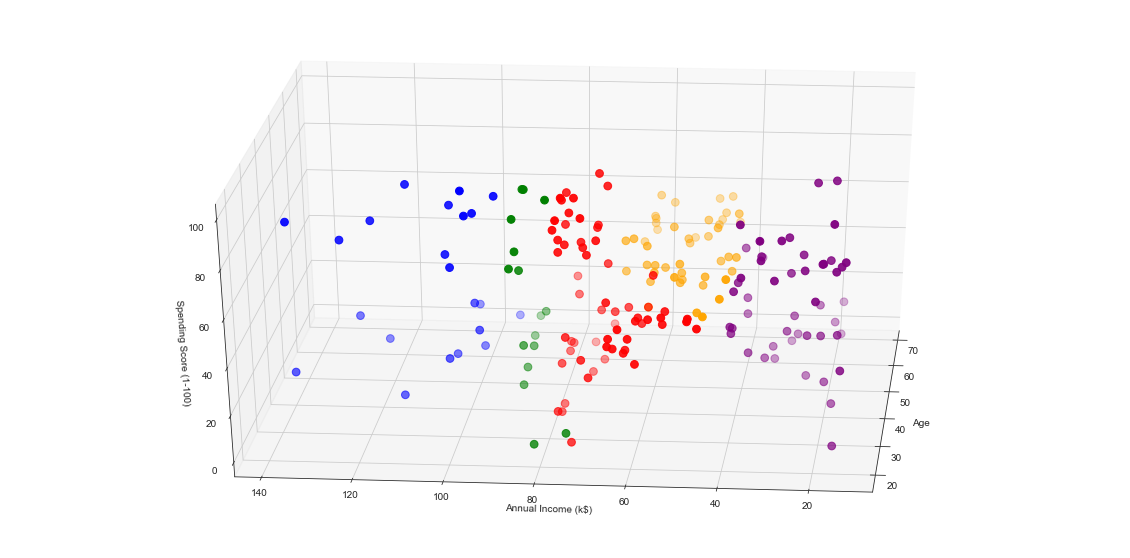

In [22]:
cluster_1 = np.asarray(cluster_1)
cluster_2 = np.asarray(cluster_2)
cluster_3 = np.asarray(cluster_3)
cluster_4 = np.asarray(cluster_4)
cluster_5 = np.asarray(cluster_5)
sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
clusterX1 = cluster_1[:,2].tolist()
clusterY1 = cluster_1[:,3].tolist()
clusterZ1 = cluster_1[:,4].tolist()
clusterX2 = cluster_2[:,2].tolist()
clusterY2 = cluster_2[:,3].tolist()
clusterZ2 = cluster_2[:,4].tolist()
clusterX3 = cluster_3[:,2].tolist()
clusterY3 = cluster_3[:,3].tolist()
clusterZ3 = cluster_3[:,4].tolist()
clusterX4 = cluster_4[:,2].tolist()
clusterY4 = cluster_4[:,3].tolist()
clusterZ4 = cluster_4[:,4].tolist()
clusterX5 = cluster_5[:,2].tolist()
clusterY5 = cluster_5[:,3].tolist()
clusterZ5 = cluster_5[:,4].tolist()
ax.scatter(clusterX1, clusterY1, clusterZ1, c='blue', s=60)
ax.scatter(clusterX2, clusterY2, clusterZ2, c='green', s=60)
ax.scatter(clusterX3, clusterY3, clusterZ3, c='orange', s=60)
ax.scatter(clusterX4, clusterY4, clusterZ4, c='purple', s=60)
ax.scatter(clusterX5, clusterY5, clusterZ5, c='red', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## Saving to csv file

In [23]:
export_csv = dataset_1.to_csv (r'W:\Lakehead Study material\Big data\Assignment 2\K mediod\Work directory\k_is_5\clusters_k.csv', index = None, header=True)